In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls ~cpedersen/Codes/Wavelets/sparse/

test_load_pickle.py  training_test_rand_fixed.p  valid_rand.p
training.p           training_test_rand.p        valid_test_rand_fixed.p
training_rand.p      valid.p                     valid_test_rand.p


In [6]:
folder = os.path.expanduser("~cpedersen/Codes/Wavelets/sparse/")
with open(os.path.join(folder, "training_rand.p"), 'rb') as handle:
    fields,values,preds = pickle.load(handle)
with open(os.path.join(folder, "valid_rand.p"), 'rb') as handle:
    fields_valid,values_valid,preds_valid = pickle.load(handle)


In [7]:
fields.shape

(900, 73)

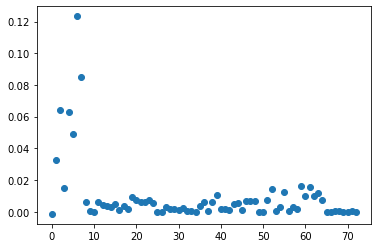

In [8]:
plt.plot(fields.mean(0),"o")

In [9]:
## This is some regularisation penaly
alphas = np.logspace(-7, -1, 1000)

In [10]:
X = fields
y = values[:, 0]
z = preds[:, 0]

rng = np.random.RandomState(0)
p = rng.permutation(len(X))
train_size = 800
Xtrain = X[p[:train_size]]
ytrain = y[p[:train_size]]
ztrain = z[p[:train_size]]

Xtest = X[p[train_size:]]
ytest = y[p[train_size:]]
ztest = z[p[train_size:]]

In [11]:
ztest.shape

(100,)

In [12]:
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    print(".", end='')

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [13]:
coefs = np.array(coefs)

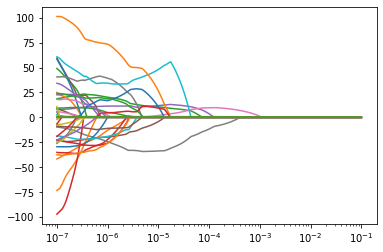

In [14]:
## The size of each coefficient as a function of penalty
plt.plot(alphas, coefs)
plt.xscale('log')

In [15]:
coefs_train = []
y_pred_train = []
y_pred_test = []
r2_train = []
r2_test = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(Xtrain, ytrain)
    coefs_train.append(lasso.coef_)
    print(".", end='')
    
    y_pred_train.append(lasso.predict(Xtrain))
    y_pred_test.append(lasso.predict(Xtest))
    r2_train.append(r2_score(ytrain, y_pred_train[-1]))
    r2_test.append(r2_score(ytest, y_pred_test[-1]))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [16]:
coefs_train = []
y_compare_train = []
y_compare_test = []
r2_train = []
r2_test = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(Xtrain, ytrain)
    coefs_train.append(lasso.coef_)
    print(".", end='')
    
    y_compare_train.append(lasso.predict(Xtrain))
    y_compare_test.append(lasso.predict(Xtest))
    r2_train.append(r2_score(ztrain, y_compare_train[-1]))
    r2_test.append(r2_score(ztest, y_compare_test[-1]))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [17]:
y_pred_test[-1].shape

(100,)

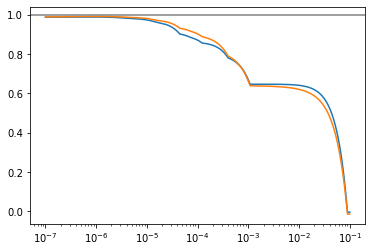

In [18]:
plt.plot(alphas, r2_train)
plt.plot(alphas, r2_test)
plt.axhline(1.0,color="gray")
plt.xscale('log')

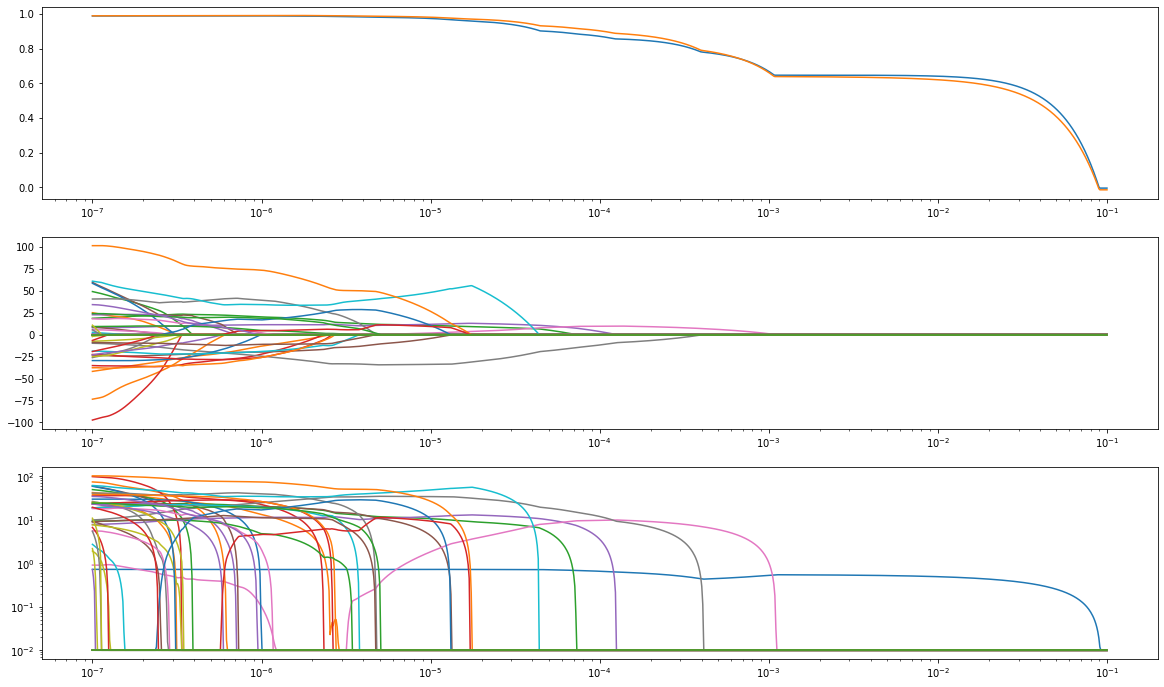

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(20, 12))
axs[0].plot(alphas, r2_train)
axs[0].plot(alphas, r2_test)
axs[0].set_xscale('log')

axs[1].plot(alphas, coefs)
axs[1].set_xscale('log')

axs[2].plot(alphas, np.abs(coefs) + 1e-2)
axs[2].set_xscale('log')
axs[2].set_yscale('log')


In [20]:
## Print r2 score for a given alpha
r2_test[np.argmin(np.abs(alphas-1e-5))]

0.9805866405489413

In [21]:
coef_interp = interp1d(alphas, coefs, axis=0)

In [22]:
alphas.shape, coefs.shape

((1000,), (1000, 73))

In [23]:
coef_interp(1e-3)

array([0.5161195 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.01940305, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [28]:
coeffs_e5=coef_interp(1e-5)

In [44]:
second_index=7
print(coeffs_e5[1:9])
print(coeffs_e5[1+8*second_index:9+8*second_index])

[  0.          10.52501937   0.          11.7204278   -4.29078938
   1.82043746 -33.84572751   0.        ]
[ 0.          0.         48.04968171 10.45642818 26.45447328  0.
  9.24869891  0.        ]


In [25]:
coef_interp(1e-6)

array([ 7.05409452e-01, -1.31258869e+01,  2.00573663e+01, -2.22449162e+01,
        1.12903819e+01, -1.98840248e+01,  9.07563209e-02, -2.44815648e+01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.95442521e-02,  0.00000000e+00,  0.00000000e+00, -2.59378516e+01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.92452803e+01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.02474376e+00,  3.92099227e+01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.60259443e+01,
        4.75754648e+00,  

In [26]:
alphas = np.logspace(-7, -1, 100)

In [27]:
## For different train/valid splits, how does the performance improve as we reduce the sparsification?

all_coefs_train = []
all_y_pred_train = []
all_y_pred_test = []
all_r2_train = []
all_r2_test = []



for i in range(50):
    rng = np.random.RandomState(i)
    p = rng.permutation(len(X))
    train_size = 800
    Xtrain = X[p[:train_size]]
    ytrain = y[p[:train_size]]

    Xtest = X[p[train_size:]]
    ytest = y[p[train_size:]]
    
    coefs_train = []
    y_pred_train = []
    y_pred_test = []
    r2_train = []
    r2_test = []
    all_coefs_train.append(coefs_train)
    all_y_pred_train.append(y_pred_train)
    all_y_pred_test.append(y_pred_test)
    all_r2_train.append(r2_train)
    all_r2_test.append(r2_test)
    print(i, end=":")
    for alpha in alphas:
        lasso = Lasso(alpha=alpha, fit_intercept=True)
        lasso.fit(Xtrain, ytrain)
        coefs_train.append(lasso.coef_)
        print(".", end='')

        y_pred_train.append(lasso.predict(Xtrain))
        y_pred_test.append(lasso.predict(Xtest))
        r2_train.append(r2_score(ytrain, y_pred_train[-1]))
        r2_test.append(r2_score(ytest, y_pred_test[-1]))

    print()
all_coefs_train = np.array(all_coefs_train)
all_y_pred_train = np.array(all_y_pred_train)
all_y_pred_test = np.array(all_y_pred_test)
all_r2_train = np.array(all_r2_train)
all_r2_test = np.array(all_r2_test)


0:....................................................................................................
1:....................................................................................................
2:....................................................................................................
3:....................................................................................................
4:....................................................................................................
5:....................................................................................................
6:....................................................................................................
7:....................................................................................................
8:....................................................................................................
9:.......................................................................

In [ ]:
plt.plot(alphas, all_r2_test.T, 'r')
plt.plot(alphas, all_r2_train.T, 'b')
plt.xscale('log')

In [ ]:
all_coefs_train.shape

In [ ]:
all_coef_interp = interp1d(alphas, np.rollaxis(all_coefs_train, 1), axis=0)

In [ ]:
plt.plot(all_coef_interp(1e-5).T)

In [ ]:
plt.plot(np.abs(all_coef_interp(1e-5).T) + 1e-5)
plt.yscale('log')

In [ ]:
preds.shape

In [ ]:
r2_score(y, preds[:, 0])

In [ ]:
all_r2_train.mean(0)[31]

In [ ]:
alphas[31]

In [ ]:
plt.plot(np.abs(all_coef_interp(alphas[31]).T) + 1e-5)
plt.yscale('log')

In [ ]:
all_coef_interp(alphas[31]).mean(0)